In [90]:
import pandas as pd
import matplotlib as plt

In [91]:
births = pd.read_csv('births.csv', index_col=[0], parse_dates=[0], squeeze=True)
births.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

Type is <class 'pandas.core.series.Series'>


<AxesSubplot:xlabel='date'>

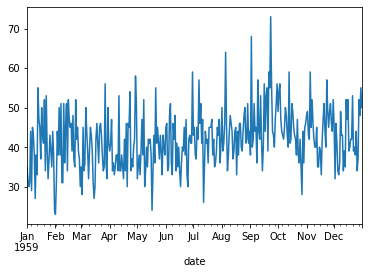

In [92]:
print('Type is', type(births))
births.plot()

In [93]:
series_value = births.values

<AxesSubplot:xlabel='date'>

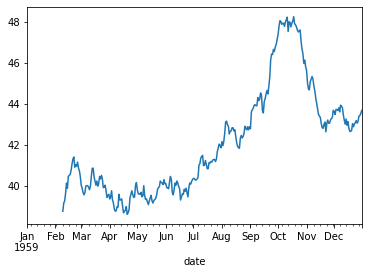

In [94]:
# smoothing to check stationary by eye
births_mean = births.rolling(window=40).mean()  
births_mean.plot()

In [95]:
value = pd.DataFrame(series_value)
birth_df = pd.concat([value, value.shift(1)], axis=1)

In [96]:
birth_df.columns = ['actual_birth', 'forecast_birth']
birth_df.head()

,actual_birth,forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [97]:
from sklearn.metrics import mean_squared_error
import numpy as np
len(birth_df.index)

365

In [98]:
birth_test = birth_df[1:365]

In [99]:
birth_error = mean_squared_error(birth_test.actual_birth, birth_test.forecast_birth)
birth_error

84.22252747252747

In [100]:
# error should be lower than the error value below
np.sqrt(birth_error)

9.177283229394606

In [101]:
# ARIMA - Autoregressive(p) Integrated (d) Moving Average(q)

In [102]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

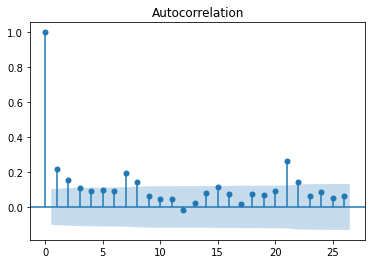

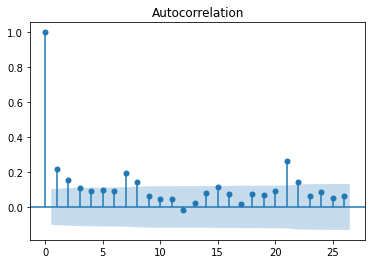

In [103]:
# plot_acf is to identify parameter Q
# ARIMA(p,d,q)
plot_acf(births)

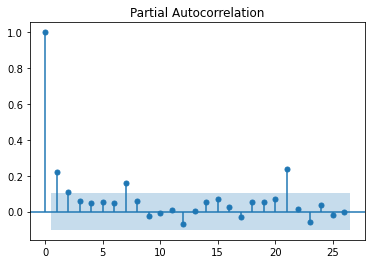

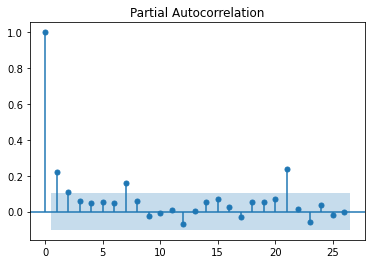

In [104]:
plot_pacf(births) # to identify the value of p

In [105]:
# p = 2,3 d = 0 & q = 3,4
births.size

365

In [106]:
birth_train = births[0:330]
birth_test = births[330:365]


In [107]:
birth_test.size

35

In [108]:
from statsmodels.tsa.arima_model import ARIMA

In [109]:
birth_model = ARIMA(birth_train, order=(2,1,3))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

In [110]:
birth_model_fit = birth_model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [111]:
birth_model_fit.aic # smaller the better

2230.9482514001165

In [113]:
birth_forecast = birth_model_fit.forecast(steps=35)[0]

In [114]:
birth_forecast

array([45.30367574, 46.31052591, 43.64944701, 44.5921945 , 46.49696467,
       44.34343257, 44.08984262, 46.34382695, 45.07528023, 43.88104437,
       45.95208938, 45.69568894, 43.97394517, 45.45669567, 46.10369493,
       44.31129021, 44.99229233, 46.26011782, 44.79339008, 44.66469089,
       46.18566702, 45.3062998 , 44.53316906, 45.94664586, 45.74836682,
       44.60557691, 45.63333861, 46.04978114, 44.84517055, 45.33687837,
       46.18213353, 45.1857841 , 45.1297583 , 46.15760412, 45.55074044])

In [116]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

6.85995477162913